# Mini Project

Adapun beberapa hal yang dipelajari pada program pelatihan Data Analitics With Python pertemuan ke-4 ini adalah sebagai berikut:

* Penggabungan data menggunakan 3 file dibawah ini: [(download data disini)](https://jne2-my.sharepoint.com/personal/ibnu_falah_jne_co_id/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fibnu%5Ffalah%5Fjne%5Fco%5Fid%2FDocuments%2FData%20for%20P%27%20Bakti&ga=1). 
    1. OTS ARAP UPDATE 30092022.XLSX; 
    2. OTS CURRENT 2022 UPDATE 30092022.XLSX; 
    3. OTS CURRENT 2022 UPDATE 30092022 PART 2.XLSX)
* Periksa data duplikat (Nomor connote apakah ada yang double)
* Periksa data anomali (Memeriksa Data OTS yang nilai nya minus)
* Data outstanding diurutkan berdasarkan nama customer – Dest Runsheet
* Analisa nilai outstanding yang tinggi berdasarkan Regional – Cabang – Kurir.
* Outstanding berdasarkan Kurir / ID Kurir (data kurir dapat dilihat di file ID Kurir.XLSX)



## Impor Data

Dalam proses impor (baca) data dari Excel ke Python, beberapa hal yang harus diperhatikan adalah:

1. Pastikan Notebook Python (Koding) anda berada dalam satu folder
2. Buatlah folder baru untuk meyimpan data tersebut (opsional) 
3. Nama file excel tidak memuat spasi (gunakan underline `_` jika diperlukan). Dalam hal ini, penulis merubah nama variabel menjadi OTS1, OTS2, dan OTS3.
4. impor packages/Library/Module yang diperlukan (dalam hal ini digunakan 'pandas')

In [34]:
import pandas as pd              # library untuk impor data
f1 = pd.read_excel('data/Mini_Project/OTS1.xlsx') 
f2 = pd.read_excel('data/Mini_Project/OTS2.xlsx') 
f3 = pd.read_excel('data/Mini_Project/OTS3.xlsx') 

Berikutnya dilakukan pemerikasan struktur data dan informasi dasar pada dataset.

In [39]:
f3.info()                        # print struktur dan informasi dasar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546785 entries, 0 to 546784
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   546785 non-null  object
 1   Unnamed: 1   546785 non-null  object
 2   Unnamed: 2   546785 non-null  object
 3   Unnamed: 3   546785 non-null  object
 4   68906809805  546785 non-null  object
 5   Unnamed: 5   546785 non-null  object
 6   Unnamed: 6   546785 non-null  object
 7   Unnamed: 7   546785 non-null  object
 8   Unnamed: 8   546785 non-null  object
 9   68906264744  546785 non-null  object
dtypes: object(10)
memory usage: 41.7+ MB


Berdasarkan pengamatan yang dilakukan pada ke-3 file dataset di atas, diperoleh beberapa catatan sebagai berikut:

1. Struktur data belum jelas karena nama variabel (kolom) pada file excel tidak ada pada baris pertama
2. Data pada `OTS1.xlsx` tidak dapat terbaca dengan baik di Python. Langkah penyelesaian permasalahan ini adalah dengan cara `Copy-Paste` file tersebut ke file excel yang baru dan replace (menimpa) file yang lama. 
3. Nama variabel (kolom) pada baris pertama belum sesuai (tidak sama).
4. Banyak kolom tidak sama.

**Catatan:** Jika tidak ingin menghapus baris pertama dari file Excel maka dapat dilakukan dengan parameter `skiprows=1`. Selain itu, anda juga dapat menggunakan parameter `header=2` untuk menunjukan nama variabel ada pada  baris ke-2. Terlebih daripada itu, jika anda ingin melewati baris pada indeks 0, 2 dan 5 dapat menggunakan `skiprows=[0,2,5]`

In [ ]:
import pandas as pd              # library untuk impor data
f1 = pd.read_excel('data/Mini_Project/OTS1.xlsx',skiprows=1, usecols='A:I, K') 
f2 = pd.read_excel('data/Mini_Project/OTS2.xlsx',header=1) 
f3 = pd.read_excel('data/Mini_Project/OTS3.xlsx',header=1) 

## Konversi Format File

Saat mengerjakan proyek analitik data dengan jumlah pengamatan yang banyak, proses menyimpan dan memuat kembali data ke dalam memori menjadi lebih lambat, dan setiap kali anda melakukan restart pada kernel akan membutuhkan waktu tunggu yang cukup lama. Sehingga, sangat disarankan untuk menyimpan data dengan format terbaik. Menurut **Ilia Zaitsev** di dalam artikelnya pada laman [Towards Data Science](https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d) file EXCEL atau CSV atau format teks biasa lainnya bukanlah pilihan yang baik. Ini terbukti dari proses loading data pada ke-3 file Excel diatas **membutuhkan kurang lebih 3 menit untuk ukuran file 64 Mb**. Sehingga, untuk mempercepat proses loading data ini maka dilakukan proses penyimpanan data dengan format `feather`.

In [ ]:
# jangan lupa `pip isntall pyarrow`

f1.to_feather('data/Mini_Project/OTS1.ftr')                  # data frame f1 ke `OTS1.ftr`
f2.to_feather('data/Mini_Project/OTS2.ftr')                  # data frame f2 ke `OTS2.ftr`
f3.to_feather('data/Mini_Project/OTS2.ftr')                  # data frame f1 ke `OTS1.ftr`

## Gabungkan Data

Setelah meyimpanan data dengan format `feather`, selanjutnya dilakukan proses penggabungan data.

In [1]:
import pandas as pd 
ftr1=pd.read_feather('data/Mini_Project/OTS1.ftr')           # impor data 
ftr2=pd.read_feather('data/Mini_Project/OTS2.ftr')           # impor data 
ftr3=pd.read_feather('data/Mini_Project/OTS2.ftr')           # impor data 

datagabung = pd.concat([ftr1,ftr2,ftr3],ignore_index=True)   # gabungkan semua data
datagabung.info()                                            # informasi dasar 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312227 entries, 0 to 1312226
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Connote No     1312227 non-null  object 
 1   Order Id       1211622 non-null  object 
 2   Origin         1312227 non-null  object 
 3   Dest Runsheet  1312227 non-null  object 
 4   Amount         1312227 non-null  int64  
 5   Project        1312227 non-null  object 
 6   POD Status     1312227 non-null  object 
 7   Customer Name  1312227 non-null  object 
 8   Regional       1312227 non-null  object 
 9   OUTSTANDING    1312227 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 100.1+ MB


**Catatan:** Banyaknya observasi (baris) sudah melebihi batas **maksimum file Excel 1048576 baris/kolom**.

## Deskripsi Data  

Berikut ini adalah deskripsi dataset yang sedang digunakan:

* `Connote` : No Nomor yang diberikan oleh Seller/Penjual berguna untuk melacak sejauh mana proses pengiriman
* `Order Id` : No Resi Pengiriman          
* `Origin` :  Asal barang yang akan dikirimkan           
* `Dest Runsheet` : Tujuan pengiriman      
* `Amount` : Biaya Pengiriman           
* `Project` : Jenis Project          
* `POD Status` :  Process On delivery Detail adalah Paket atau barang sedang atau baru saja dikirimkan oleh kurir.   
* `Customer Name`: Nama Pelanggan       
* `Regional` : Regional          
* `Kategori` :  Kategori           
* `OUTSTANDING` : Capaian/Nilai akhir (Verifikasi biaya pengiriman)      

**Catatan:** Data gabungan tersebut disimpan dengan format `feather`, sehingga untuk selanjutnya data ini yang akan di impor pada saat melakukan analisis.

In [135]:
datagabung.to_feather('data/Mini_Project/datagabung.ftr') # data frame f1 ke `OTS1.ftr`

### Quiz 1

Lakukan proses impor data dan memeriksa struktur data  dengan format `feather`!

## Verifikasi Kelengkapan Data

Dataset terkadang memuat data yang hilang, bisa saja karena tidak dikumpulkan atau tidak pernah ada. Sehingga, untuk melakukan analisa perlu dilakukan [pemeriksaan kelengkapan data](https://stackoverflow.com/questions/26266362/how-do-i-count-the-nan-values-in-a-column-in-pandas-dataframe) terlebih dahulu. 

In [2]:
df=pd.read_feather('data/Mini_Project/datagabung.ftr')  # impor data 
df.isna().sum()                                         # jlh data hilang disetiap kolom

Connote No            0
Order Id         100605
Origin                0
Dest Runsheet         0
Amount                0
Project               0
POD Status            0
Customer Name         0
Regional              0
OUTSTANDING           0
dtype: int64

Berikut ini diperlihatkan cara untuk mengekstrak baris yang berisi setidaknya satu nilai yang hilang:

In [137]:
df[df.isna().any(axis=1)]

,Connote No,Order Id,Origin,Dest Runsheet,Amount,Project,POD Status,Customer Name,Regional,OUTSTANDING
962,3012652100730710,None,DPK,BOO,214240,COD CNC,D10,RINJANI ROYAL CISMETINDO PT / COD,BODETABEKCIL,214240.0
1596,JNAC-0015215845,None,CBN,BOO,56650,COD CORPORATE,D01,LAZADA MPDS COD,BODETABEKCIL,56650.0
22446,JNER-1000117379,None,CKR,CKR,2199000,COD CORPORATE,D10,LAZADA MPDS COD,BODETABEKCIL,2199000.0
23125,0100142102776621,None,CGK,CGK,950000,COD CORPORATE,D09,SENHONG INTERNATIONAL,JAKARTA,950000.0
23126,0100142102904199,None,CGK,CGK,890000,COD CORPORATE,D01,SENHONG INTERNATIONAL,JAKARTA,890000.0
...,...,...,...,...,...,...,...,...,...,...
218598,JNXB-0001207352,None,CGK,MES,27000,COD CORPORATE,D09,LAZADA MPDS COD,SUMATERA REG. UTARA,27000.0
218599,JNXB-0001207373,None,CGK,MES,21000,COD CORPORATE,D01,LAZADA MPDS COD,SUMATERA REG. UTARA,21000.0
218600,JNXB-0001207895,None,CGK,MES,92000,COD CORPORATE,D06,LAZADA MPDS COD,SUMATERA REG. UTARA,92000.0
218601,JNXB-0001208491,None,CGK,MES,213000,COD CORPORATE,D08,LAZADA MPDS COD,SUMATERA REG. UTARA,213000.0


**Catatan:** Data yang hilang tersebut berasal dari file `OTS1.xlsx`

## Perbaharui Data

Berikut ini dilakukan proses penggantian data yang hilang menggunakan nilai dari kolom lain yang besesuaian barisnya.

In [3]:
df['Order Id'] = df['Order Id'].fillna(value=df['Connote No'])
df.isna().sum()                                                 

Connote No       0
Order Id         0
Origin           0
Dest Runsheet    0
Amount           0
Project          0
POD Status       0
Customer Name    0
Regional         0
OUTSTANDING      0
dtype: int64

### Quiz 2 

Bagaimana jika anda ingin menggantikan semua nilai pada 'Order Id' adalah sama dengan 'Connote No'? Buatlah script anda menggunakan Python!

## Periksa Data Duplikat

Selain identifikasi missing values, kita juga dapat mengidentifikasi adanya data yang duplikat di dataframe Pandas. Anda dapat menggunakan metode berikut untuk [menghitung duplikat](https://blog.finxter.com/4-best-ways-to-count-duplicates-in-a-dataframe/):

In [139]:
df.pivot_table(columns=['Connote No'], aggfunc='size')

Connote No
00001597324367      2
00001774777169      2
00003088381542      2
00003088839431      2
00003088872622      2
                   ..
Y220929970421965    2
Y220929971437980    2
Y220929976998741    2
Y220929983918700    2
Y220929997027189    2
Length: 765306, dtype: int64

Berikut ini contoh untuk memperlihatkan data duplikat dalam dataframe berdasarkan kolom `Connote No`:

In [140]:
df[df.duplicated(['Connote No'])]

,Connote No,Order Id,Origin,Dest Runsheet,Amount,Project,POD Status,Customer Name,Regional,OUTSTANDING
219528,3012652200220968,3012652200220968,DPK,KRW,209000,COD CNC,D01,RINJANI ROYAL CISMETINDO PT / COD,JAWA BARAT,209000.0
527533,1727142200054526,1727142200054526,CLG,AMI,181000,COD CNC,D01,MB STORE / COD,"JATIM, BALI & NUSRA",181000.0
528595,2010992200558197,2010992200558197,AMI,AMI,129000,COD CNC,D01,RINJANI ROYAL CISMETINDO PT / COD,"JATIM, BALI & NUSRA",129000.0
528627,2010992200603043,2010992200603043,AMI,AMI,214000,COD CNC,D01,RINJANI ROYAL CISMETINDO PT / COD,"JATIM, BALI & NUSRA",214000.0
528636,2010992200606533,2010992200606533,AMI,AMI,200000,COD CNC,D06,RINJANI ROYAL CISMETINDO PT / COD,"JATIM, BALI & NUSRA",200000.0
...,...,...,...,...,...,...,...,...,...,...
1312222,5445782200015795,5445782200015795,TGR,TKG,141110,COD RETAIL,D01,GOLO / COD,SUMATERA REG. SELATAN,141110.0
1312223,5441602200100864,5441602200100864,TGR,TKG,925970,COD RETAIL,D01,MGANIK / COD,SUMATERA REG. SELATAN,925970.0
1312224,5441602200101581,5441602200101581,TGR,TKG,323420,COD RETAIL,D01,MGANIK / COD,SUMATERA REG. SELATAN,323420.0
1312225,5441602200098233,5441602200098233,TGR,TKG,650960,COD RETAIL,D01,MGANIK / COD,SUMATERA REG. SELATAN,650960.0


**Catatan:** Dari hasil pemeriksaan data duplikat diatas, diduga kuat bahwa data duplikat tersebut adalah data pengulangan. Olehkarena itu, data duplikat ini dapat dihapuskan. Untuk [menghapus data duplikat](https://www.statology.org/pandas-drop-duplicates/) ini dapat dilakukan dengan cara berikut:

In [4]:
df = df.drop_duplicates(['Connote No'], keep='last') # hapus data duplikat 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765306 entries, 0 to 1312226
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Connote No     765306 non-null  object 
 1   Order Id       765306 non-null  object 
 2   Origin         765306 non-null  object 
 3   Dest Runsheet  765306 non-null  object 
 4   Amount         765306 non-null  int64  
 5   Project        765306 non-null  object 
 6   POD Status     765306 non-null  object 
 7   Customer Name  765306 non-null  object 
 8   Regional       765306 non-null  object 
 9   OUTSTANDING    765306 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 64.2+ MB


## Periksa Data Anomali

Pemeriksaan data anomali bertujuan untuk menemukan atau menganalisis suatu nilai yang dianggap menyimpangan atau memiliki keanehan yang terjadi atau dengan kata lain tidak seperti biasanya. Berikut ini dilakukan pemerikasaan data anomali dengan statistik deskriptif numerikal.

In [5]:
df.describe()

,Amount,OUTSTANDING
count,7.653060e+05,7.653060e+05
mean,1.298612e+05,1.297907e+05
std,1.994777e+05,1.994349e+05
min,0.000000e+00,-1.769078e+06
25%,3.499900e+04,3.499400e+04
50%,7.550000e+04,7.540000e+04
75%,1.690000e+05,1.690000e+05
max,1.349100e+07,1.349100e+07


**Catatan:** Ditemukan bahwa terdapat nilai `OUTSTANDING` yang negatif. 

### Quiz 3

Berikut ini diperlihatkan data `OUTSTANDING` yang bernilai negatif. Lengkapi script dibawah, jika anda ingin memperbaharui nilai pada kolom OUTSTANDING tersebut dengan menggunakan nilai dari kolom `Amount`.

In [145]:
df.loc[df['OUTSTANDING'] < 0, 'OUTSTANDING']

128811     -10000.0
142237     -43610.0
142238    -190610.0
142239   -1769078.0
151009      -3332.0
            ...    
189461      -7486.0
207695     -10000.0
209666     -22461.0
211599    -100000.0
943704     -16000.0
Name: OUTSTANDING, Length: 62, dtype: float64

Berikut ini diperlihatkan data2 yang memuat nilai negatif tersebut menggunakan fungsi [`query` yang disediakan library `pandas`](https://sparkbyexamples.com/pandas/pandas-filter-by-column-value/).

In [146]:
ots_negatif = df.query("OUTSTANDING < 0")
ots_negatif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 128811 to 943704
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Connote No     62 non-null     object 
 1   Order Id       62 non-null     object 
 2   Origin         62 non-null     object 
 3   Dest Runsheet  62 non-null     object 
 4   Amount         62 non-null     int64  
 5   Project        62 non-null     object 
 6   POD Status     62 non-null     object 
 7   Customer Name  62 non-null     object 
 8   Regional       62 non-null     object 
 9   OUTSTANDING    62 non-null     float64
dtypes: float64(1), int64(1), object(8)
memory usage: 5.3+ KB


Untuk mengurutkan data `OUTSTANDING` negatif yang paling besar ke paling kecil dapat digunakan script berikut:

In [147]:
ots_negatif.sort_values('OUTSTANDING', ascending=True)

,Connote No,Order Id,Origin,Dest Runsheet,Amount,Project,POD Status,Customer Name,Regional,OUTSTANDING
142239,CGKEC30636014422,CGKEC30636014422,CGK,PNK,100000,COD UPS,D01,CGK COD UPS CARDIG,KALIMANTAN,-1769078.0
166174,2111801900093819,2111801900093819,AMQ,AMQ,278000,COD CORPORATE,D01,SALESTOCK COD,SULAMPAPUA,-1016380.0
166024,2111801900063390,2111801900063390,AMQ,AMQ,462480,COD CORPORATE,D01,SALESTOCK COD,SULAMPAPUA,-985520.0
166061,2111801900071252,2111801900071252,AMQ,AMQ,238000,COD CORPORATE,D01,SALESTOCK COD,SULAMPAPUA,-752000.0
166205,2111801900099410,2111801900099410,AMQ,AMQ,338880,COD CORPORATE,D01,SALESTOCK COD,SULAMPAPUA,-446020.0
...,...,...,...,...,...,...,...,...,...,...
187612,JNRP-0013069369,JNRP-0013069369,CGK,DJJ,156000,COD CORPORATE,D01,LAZADA MPDS COD,SULAMPAPUA,-666.0
168585,2901961800115130,2901961800115130,DJJ,DJJ,658500,COD CORPORATE,D01,SALESTOCK COD,SULAMPAPUA,-500.0
166111,2111801900079131,2111801900079131,AMQ,AMQ,343040,COD CORPORATE,D01,SALESTOCK COD,SULAMPAPUA,-500.0
178266,JNCB-0300665670,JNCB-0300665670,DPS,DJJ,138116,COD CORPORATE,D01,LAZADA MPDS COD,SULAMPAPUA,-142.0


### Quiz 4

Perhatikan script dibawah ini, kemudian lakukan pembaharuan data `OUTSTANDING` yang bernilai negatif tersebut menjadi satu dataframe baru. Gunakan gunakan `pd.DataFrame()`.

In [148]:
ots_negatif = df.query("OUTSTANDING < 0")

Berikut ini dilakukan pemerikasaan data anomali dengan statistik deskriptif kategorikal.

In [149]:
kategori = df.select_dtypes(include='object') # pilih data kategori
kategori.describe().transpose()               # deskriptif kategorical

,count,unique,top,freq
Connote No,765306,765306,0100792200104454,1
Order Id,765306,765202,0226472200012531,62
Origin,765306,60,CGK,207272
Dest Runsheet,765306,62,SUB,92738
Project,765306,5,COD CORPORATE,679957
POD Status,765306,15,D01,687463
Customer Name,765306,2647,LAZADA MPDS COD,551355
Regional,765306,9,"JATIM, BALI & NUSRA",218953


### Quiz 5

Berikan pendapat (temuan) anda mengenai statistik deskriptif kategorikal diatas!

## Membuat Kolom Baru

Dalam analisis data terkadang kita perlu membuat kolom baru untuk menampung informasi yang lebih detail yang dapat membantu kita melihat lebih jauh tentang data yang sedang kita observasi. Untuk itu, pada tulisan ini, saya akan membahas cara menambahkan kolom baru pada dataframe pandas. Berikut ini dilakukan penambahan kolom baru untuk melihat `Selisih` nilai antara kolom `Amount` dan `OUTSTANDING`.

In [6]:
df['Selisih'] = (df['OUTSTANDING']-df['Amount'])

### Quiz 6

Dataframe diatas sudah memiliki kolom `Selisih` nilai dari kolom `Amount` dan `OUTSTANDING`. Bagaimana jika anda diminta untuk memperlihatkan nilai selisih yang lebih besar dan lebih kecil dari nol? tunjukan script dan hasilnya!

## Analisis Outstanding

### Regional

Berikut ini adalah Analisa nilai outstanding yang berdasarkan Regional:

In [88]:
# Tabel Pivot
ots=pd.pivot_table(df,index=['Regional'], 
                   values=['OUTSTANDING'], aggfunc='sum')

# Komfersi indeks menjadi Kolom
ots.reset_index(inplace=True)

# Urutkan data dari yang besar ke kecil
ots=ots.sort_values(['OUTSTANDING'],ascending=False).head(100)

# Konversi Total omset menjadi per-juta 
ots["OUTSTANDING"] = (ots['OUTSTANDING']/1000000)

ots

,Regional,OUTSTANDING
2,"JATIM, BALI & NUSRA",24036.152920
6,SULAMPAPUA,19062.006514
5,KALIMANTAN,10212.505786
0,BODETABEKCIL,9379.149909
8,SUMATERA REG. UTARA,9177.094226
7,SUMATERA REG. SELATAN,9070.247045
3,JAWA BARAT,8690.865457
4,JAWA TENGAH & DIY,7843.426443
1,JAKARTA,1858.182450


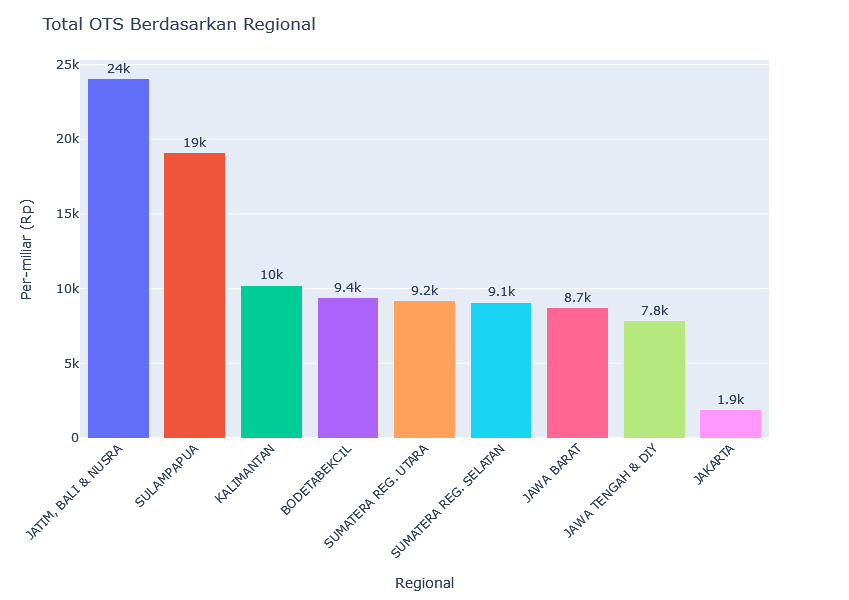

In [93]:
# impor library yg dibutuhkan untuk visualisasi
import plotly.express as px

# membuat grafik batang (bar-chart)
fig = px.bar(ots, y='OUTSTANDING', x='Regional',color='Regional', text_auto='.2s')

# Pengaturan detail grafik
fig.update_layout(barmode='stack',
                  width=800,
                  height=600,
                  showlegend=False,
                  title="Total OTS Berdasarkan Regional",
                  xaxis_title="Regional",
                  yaxis_title="Per-miliar (Rp)")

# Pengaturan rotasi axis x (+-360 derajat)
fig.update_xaxes(tickangle=-45, showticklabels=True)

# Pengaturan posisi, ukuran, dan rotasi teks
fig.update_traces(textfont_size=12, textangle=0, textposition="outside")

fig.show()

### Pelanggan & Tujuan

Berikut ini dperlihatkan pencapaian **(outstanding)** yang diurutkan berdasarkan nama `customer ~ Dest Runsheet`.

In [86]:
# Tabel Pivot
ots=pd.pivot_table(df,index=['Customer Name','Dest Runsheet'], 
                   values=['OUTSTANDING'], aggfunc='sum')

# Komfersi indeks menjadi Kolom
ots.reset_index(inplace=True)

# Urutkan data dari yang besar ke kecil
ots=ots.sort_values(['OUTSTANDING'],ascending=False).head(100)

# Konversi Total omset menjadi per-juta 
ots["OUTSTANDING"] = (ots['OUTSTANDING']/1000000)

ots

,Customer Name,Dest Runsheet,OUTSTANDING
8978,LAZADA MPDS COD,SUB,6638.606005
8980,LAZADA MPDS COD,TGR,3699.967101
8930,LAZADA MPDS COD,BDO,3036.068315
8953,LAZADA MPDS COD,KOE,2943.961754
8959,LAZADA MPDS COD,MJK,2450.080273
...,...,...,...
11150,ORDIVO TEKNOLOGY,BTJ,150.349723
9770,MENGANTAR KARYA BANGSA PT / COD,CGK,143.056835
9807,MENGANTAR KARYA BANGSA PT / COD,SOQ,142.298665
13998,SICEPAT EKSPRES INDONESIA / COD,MDC,141.480843


Untuk menganalisis secara visual, dapat diperlihatkan dengan menggunakan `Bar-Chart` sebagai berikut:

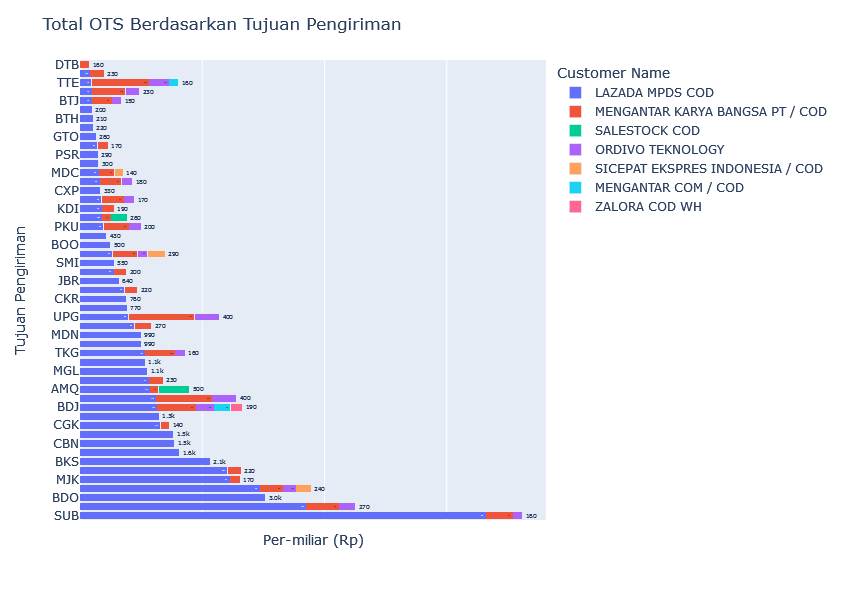

In [87]:
# impor library yg dibutuhkan untuk visualisasi
import plotly.express as px

# membuat grafik batang (bar-chart)
fig = px.bar(ots, y='Dest Runsheet', x='OUTSTANDING',color='Customer Name', text_auto='.2s')

# Pengaturan detail grafik
fig.update_layout(barmode='stack',
                  width=1000,
                  height=600,
                  showlegend=True,
                  title="Total OTS Berdasarkan Tujuan Pengiriman",
                  xaxis_title="Per-miliar (Rp)",
                  yaxis_title="Tujuan Pengiriman")

# Pengaturan rotasi axis x (+-360 derajat)
fig.update_xaxes(tickangle=0, showticklabels=False)

# Pengaturan posisi, ukuran, dan rotasi teks
fig.update_traces(textfont_size=12, textangle=0, textposition="outside")

fig.show()

### Quiz 7

Buatlah Analisa nilai outstanding yang berdasarkan `Dest Runsheet` dan `POD Status`

### Quiz 8 

Buatlah Analisa nilai outstanding yang berdasarkan `Origin` dan `Dest Runsheet` 

### Projek

Berikut ini diperlihatkan analisis Outstanding berdasarkan persentase `Project`:

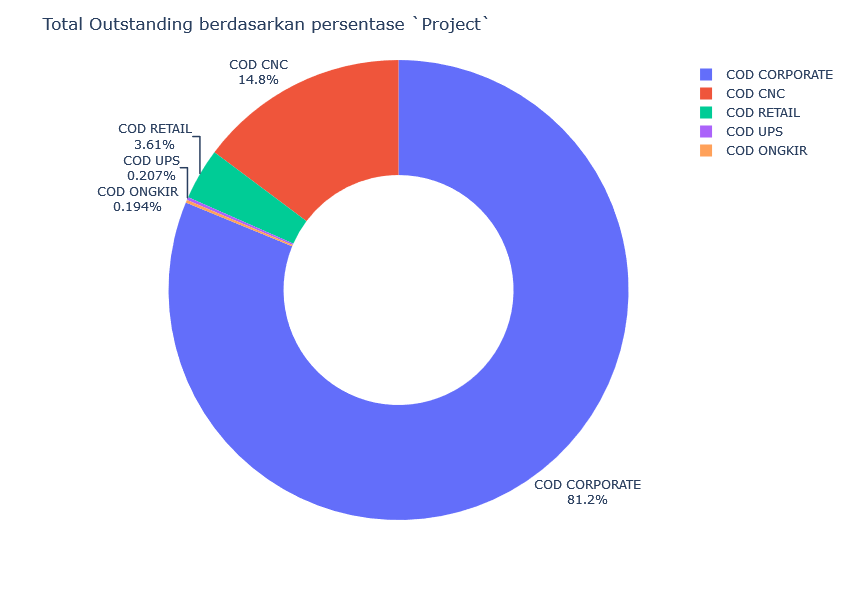

In [96]:
# Tabel Pivot untuk menghitung jumlah omzet berdasarkan Region
df=pd.pivot_table(df,index=['Project'], values=['OUTSTANDING'], aggfunc='sum')

# Komfersi indeks menjadi Kolom
df.reset_index(inplace=True)

# Konversi Total omset menjadi per-miliar 
df["OUTSTANDING"] = (df['OUTSTANDING']/1000000000)

import plotly.express as px
# membuat grafik lingkaran (pie-chart)
fig = px.pie(df, values='OUTSTANDING', names='Project', hole=0.5)

# Pengaturan detail grafik
fig.update_layout(showlegend=True,
                  autosize=False,
                  width=800,
                  height=600,
                  title="Total Outstanding berdasarkan persentase `Project`");

fig.update_traces(textposition='outside', textinfo='percent+label');

fig.show()
